In [1]:
# Desafio 
# @author: Marcos Teixeira

In [1]:
# imports

import numpy as np
import pandas as pd

import os
from collections import Counter
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.utils.multiclass import unique_labels
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

import matplotlib.pyplot as plt
import lightgbm as lgb

/usr/local/lib/python3.7/site-packages/lightgbm/__init__.py:46: UserWarning: Starting from version 2.2.1, the library file in distribution wheels for macOS is built by the Apple Clang (Xcode_8.3.3) compiler.
This means that in case of installing LightGBM from PyPI via the ``pip install lightgbm`` command, you don't need to install the gcc compiler anymore.
Instead of that, you need to install the OpenMP library, which is required for running LightGBM on the system with the Apple Clang compiler.
You can install the OpenMP library by the following command: ``brew install libomp``.
  "You can install the OpenMP library by the following command: ``brew install libomp``.", UserWarning)


In [2]:
# utilitary function
def plot_confusion_matrix(y_true, y_pred, classes,
                          normalize=True,
                          title=None,
                          cmap=plt.cm.Blues):
    if not title:
        if normalize:
            title = 'Normalized confusion matrix'
        else:
            title = 'Confusion matrix, without normalization'

    # Compute confusion matrix
    cm = confusion_matrix(y_true, y_pred)
    # Only use the labels that appear in the data
    #classes = classes[unique_labels(y_true, y_pred)]
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    fig, ax = plt.subplots()
    im = ax.imshow(cm, interpolation='nearest', cmap=cmap)
    ax.figure.colorbar(im, ax=ax)
    # We want to show all ticks...
    ax.set(xticks=np.arange(cm.shape[1]),
           yticks=np.arange(cm.shape[0]),
           # ... and label them with the respective list entries
           xticklabels=classes, yticklabels=classes,
           title=title,
           ylabel='True label',
           xlabel='Predicted label')

    # Rotate the tick labels and set their alignment.
    plt.setp(ax.get_xticklabels(), rotation=45, ha="right",
             rotation_mode="anchor")

    # Loop over data dimensions and create text annotations.
    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, format(cm[i, j], fmt),
                    ha="center", va="center",
                    color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()
    return ax

In [3]:
# Baseline
def logistic_regression_experiment(xtrain, xtest, ytrain, ytest, cm=False):
    # baseline approach : Linear Regression using all variables
    from sklearn.linear_model import LogisticRegression

    # building the model
    model = LogisticRegression()
    model.fit(xtrain, ytrain)

    preds = model.predict(xtest)
    if cm:
        classes=["normal", "fraud"]
        plot_confusion_matrix(ytest,preds,classes,title='Confusion matrix')

    accuracy = accuracy_score(preds,ytest)
    recall = recall_score(preds,ytest)
    precision = precision_score(preds,ytest)
    f1 = f1_score(preds,ytest)

    print("accuracy : {}".format(accuracy))
    print("recall : {}".format(recall))
    print("precision : {}".format(precision))
    print("f1 score : {}".format(f1))
    # accuracy : 0.9994666666666666
    # recall : 1.0
    # precision : 0.68
    # f1 score : 0.8095238095238095

In [4]:
# Light GBM setup
def lightGBM_experiment(xtrain, xtest, ytrain, ytest, columns, plot_importance=False,cm=False):
    # parameters for LightGBMClassifier
    params = {
        'objective' :'multiclass',
        'learning_rate' : 0.02,
        'num_leaves' : 31,
        'is_unbalance': 'true',
        "max_depth": -1,
        "num_class": 2,
        'feature_fraction': 0.5,
        'bagging_fraction': 0.5,
        'boosting_type' : 'gbdt',
        'verbosity': 1
    }

    lgtrain = lgb.Dataset(xtrain,ytrain)
    clf = lgb.train(params, lgtrain, 300, feature_name=list(columns))
    preds = clf.predict(xtest)
    preds = np.argmax(preds, axis=1)
    
    if cm:
        classes=["normal", "fraud"]
        plot_confusion_matrix(ytest,preds,classes,title='Confusion matrix')

    accuracy = accuracy_score(preds,ytest)
    recall = recall_score(preds,ytest)
    precision = precision_score(preds,ytest)
    f1 = f1_score(preds,ytest)

    print("accuracy : {}".format(accuracy))
    print("recall : {}".format(recall))
    print("precision : {}".format(precision))
    print("f1 score : {}".format(f1))
    # accuracy : 0.9996666666666667
    # recall : 0.9545454545454546
    # precision : 0.84
    # f1 score : 0.8936170212765958
    if plot_importance:
        ax = lgb.plot_importance(clf)
        ax.plot()
        plt.show()

In [22]:
def NN_experiment(xtrain, xtest, ytrain, ytest, cm=False):
    # baseline approach : Linear Regression using all variables
    from sklearn.neural_network import MLPClassifier

    # building the model
    model = MLPClassifier(hidden_layer_sizes=(100, ), activation='relu', solver='adam', 
                          alpha=0.0001, batch_size='auto', learning_rate='constant', 
                          learning_rate_init=0.001, power_t=0.5, max_iter=50, shuffle=True, 
                          random_state=None, tol=0.0001, verbose=False, warm_start=False, 
                          momentum=0.9, nesterovs_momentum=True, early_stopping=False, 
                          validation_fraction=0.1, beta_1=0.9, beta_2=0.999, epsilon=1e-08, 
                          n_iter_no_change=10)
    model.fit(xtrain, ytrain)

    preds = model.predict(xtest)
    if cm:
        classes=["normal", "fraud"]
        plot_confusion_matrix(ytest,preds,classes,title='Confusion matrix')

    accuracy = accuracy_score(preds,ytest)
    recall = recall_score(preds,ytest)
    precision = precision_score(preds,ytest)
    f1 = f1_score(preds,ytest)

    print("accuracy : {}".format(accuracy))
    print("recall : {}".format(recall))
    print("precision : {}".format(precision))
    print("f1 score : {}".format(f1))
    # accuracy : 0.9996333333333334
    # recall : 0.9333333333333333
    # precision : 0.84
    # f1 score : 0.8842105263157894

In [2]:
# paths
DATASITH_PATH='/Users/marcostexeira/Downloads/DESAFIO_CREDITO/'
DATASITH_FILE='desafio_fraude.csv'


In [3]:
def load_fraud_data(data_path,file):
    csv_path = os.path.join(data_path, file)
    return pd.read_csv(csv_path)

In [4]:
# loading data
dataset = load_fraud_data(DATASITH_PATH,DATASITH_FILE)
np_dataset = dataset.values


Missing data ??

In [9]:
missing_dataset = dataset.isna()
dataset_num_missing = missing_dataset.sum()

print(dataset_num_missing)

Ocorrencia    0
PP1           0
PP2           0
PP3           0
PP4           0
PP5           0
PP6           0
PP7           0
PP8           0
PP9           0
PP10          0
PP11          0
PP12          0
PP13          0
PP14          0
PP15          0
PP16          0
PP17          0
PP18          0
PP19          0
PP20          0
PP21          0
PP22          0
PP23          0
PP24          0
PP25          0
PP26          0
PP27          0
PP28          0
Sacado        0
Fraude        0
dtype: int64


In [5]:
# data split 80% train / 20% test
xtrain, xtest, ytrain, ytest = train_test_split(np_dataset[:, :-1],np_dataset[:, -1],test_size=0.2, random_state=42)

ytrain = ytrain.astype(int)
ytest = ytest.astype(int)

In [6]:
xtrain.shape

(120000, 30)

In [6]:
print(Counter(np_dataset[:, -1]).most_common(2))

[(0.0, 149763), (1.0, 237)]


## Baseline : Linear Regression

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


Normalized confusion matrix
accuracy : 0.9994666666666666
recall : 1.0
precision : 0.68
f1 score : 0.8095238095238095


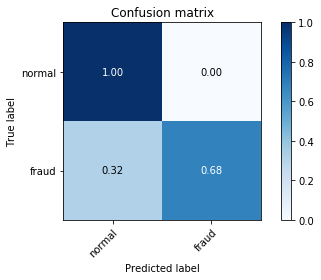

In [12]:
logistic_regression_experiment(xtrain, xtest, ytrain, ytest,cm=True)

## Melhorando com modelo de Boosting : Light GBM

Normalized confusion matrix
accuracy : 0.9996666666666667
recall : 0.9545454545454546
precision : 0.84
f1 score : 0.8936170212765958


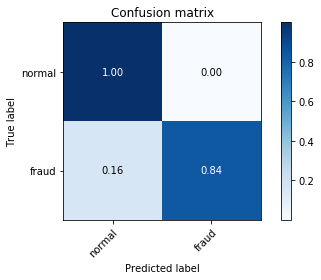

In [13]:
lightGBM_experiment(xtrain, xtest, ytrain, ytest,dataset.columns[:-1].values,cm=True)

## Redes Neurais (Multi-layer Perceptron)

/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (50) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Normalized confusion matrix
accuracy : 0.9996333333333334
recall : 0.9333333333333333
precision : 0.84
f1 score : 0.8842105263157894


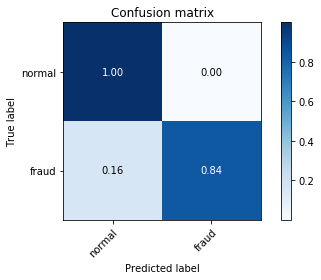

In [23]:
NN_experiment(xtrain, xtest, ytrain, ytest,cm=True)

 * Vamos tentar diminuir a dimensionalidade das features para tentar uma melhoria da performance. 
 * Um algoritmo padrão na literatura para tal é o PCA (Principle Component Analysis)
 * A dimensionalidade inicial é de 30-d, vamos tentar reduzir para 2-d, 10-d e 20-d, analisando a variância perdida

In [51]:
from sklearn.decomposition import PCA

# dimensions
dims = [2,10,20]

x = dataset.values[:, :-1]

In [18]:
pca = PCA(n_components = dims[0])
X2D = pca.fit_transform(x)

Voltando para o espaço original 

In [22]:
X30D_inv = pca.inverse_transform(X2D)
print(1 - pca.explained_variance_ratio_.sum())

3.5290984912172974e-08


treinar os modelos nesse nessa nova dimensionalidade

In [41]:
xtrain, xtest, ytrain, ytest = train_test_split(X2D, dataset.values[:, -1],test_size=0.2, random_state=42)

ytrain = ytrain.astype(int)
ytest = ytest.astype(int)

In [48]:
logistic_regression_experiment(xtrain, xtest, ytrain, ytest)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


accuracy : 0.9983333333333333
recall : 0.0
precision : 0.0
f1 score : 0.0


/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


In [49]:
lightGBM_experiment(xtrain, xtest, ytrain, ytest,dataset.columns[:-1].values)

accuracy : 0.9983333333333333
recall : 0.0
precision : 0.0
f1 score : 0.0


In [50]:
NN_experiment(xtrain, xtest, ytrain, ytest)

accuracy : 0.9983333333333333
recall : 0.0
precision : 0.0
f1 score : 0.0


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)
/usr/local/lib/python3.7/site-packages/sklearn/metrics/classification.py:1439: UndefinedMetricWarning: F-score is ill-defined and being set to 0.0 due to no true samples.
  'recall', 'true', average, warn_for)


Muito ruim !!

In [56]:
pca = PCA(n_components = dims[1])
X10D = pca.fit_transform(x)

In [57]:
X10D[:5]

array([[-4.02512121e+04, -6.18793599e+01, -1.70687174e+00,
         7.69466108e-01, -4.62090602e-01,  1.41268723e+00,
        -4.01571718e-02,  1.62514909e+00, -1.08545998e+00,
         7.08814929e-03],
       [-4.02502277e+04,  3.16743687e+02, -1.50765133e+00,
         7.55026552e-01, -1.46154211e+00,  1.62412721e-02,
         7.92657053e-01, -1.45848645e-01, -7.18931149e-02,
         2.09153950e+00],
       [-4.02492439e+04,  7.09748896e+02, -1.49173535e+00,
         9.76320982e-01, -2.89072326e-01, -3.40803817e-01,
         5.30465067e-01,  1.42382016e+00, -6.17811818e-01,
         3.92126384e-01],
       [-4.02492122e+04, -5.89817070e+01, -1.40212483e+00,
        -2.40025087e-01,  8.60928377e-01,  6.32711179e-01,
         3.11474396e-01, -8.87654689e-01, -5.66598844e-02,
         8.50433315e-02],
       [-4.02482324e+04,  4.31916684e+02,  3.12780551e+00,
         1.07640988e+00, -6.16325565e-01,  1.35683641e+00,
         1.82828667e-01,  2.23620200e-01, -1.96406376e+00,
         6.

In [58]:
X30D_inv = pca.inverse_transform(X10D)
print(1 - pca.explained_variance_ratio_.sum())

1.523833692562704e-08


In [59]:
xtrain, xtest, ytrain, ytest = train_test_split(X10D, dataset.values[:, -1],test_size=0.2, random_state=42)

ytrain = ytrain.astype(int)
ytest = ytest.astype(int)

In [60]:
logistic_regression_experiment(xtrain, xtest, ytrain, ytest)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy : 0.9987333333333334
recall : 0.875
precision : 0.28
f1 score : 0.42424242424242425


In [61]:
lightGBM_experiment(xtrain, xtest, ytrain, ytest),dataset.columns[:-1].values

accuracy : 0.9992666666666666
recall : 0.9666666666666667
precision : 0.58
f1 score : 0.725


In [64]:
NN_experiment(xtrain, xtest, ytrain, ytest)

accuracy : 0.9980333333333333
recall : 0.32
precision : 0.16
f1 score : 0.21333333333333335


/usr/local/lib/python3.7/site-packages/sklearn/neural_network/multilayer_perceptron.py:566: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (40) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


Ainda muito abaixo dos resultados com dimensionalidade original. Vamos ao último PCA


In [67]:
pca = PCA(n_components = dims[2])
X20D = pca.fit_transform(x)

In [68]:
X30D_inv = pca.inverse_transform(X20D)
print(1 - pca.explained_variance_ratio_.sum())

4.1269014872113985e-09


In [69]:
xtrain, xtest, ytrain, ytest = train_test_split(X20D, dataset.values[:, -1],test_size=0.2, random_state=42)

ytrain = ytrain.astype(int)
ytest = ytest.astype(int)

In [70]:
logistic_regression_experiment(xtrain, xtest, ytrain, ytest)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


accuracy : 0.9995
recall : 0.9069767441860465
precision : 0.78
f1 score : 0.8387096774193548


In [71]:
lightGBM_experiment(xtrain, xtest, ytrain, ytest,dataset.columns[:-1].values)

accuracy : 0.9995333333333334
recall : 0.95
precision : 0.76
f1 score : 0.8444444444444444


In [76]:
NN_experiment(xtrain, xtest, ytrain, ytest)

accuracy : 0.9988666666666667
recall : 0.8333333333333334
precision : 0.4
f1 score : 0.5405405405405406
